<a href="https://colab.research.google.com/github/viridescentavian/UCLA-CSSI/blob/main/HW1_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 Part 2: Linear Regression Notebook


In [62]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import warnings
warnings.filterwarnings('ignore')
# Displays the plots in notebook
%matplotlib inline

<a class="anchor" id="third-bullet"></a>
## Linear Regression

We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with four observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3, 4$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 0), (2, 2), (3, 4), (5, 5)\}
\end{equation*}

As we discussed in the lecture, we want to fit a model $y=\beta_0 + \beta_1 x$ given these observations by minimizing the mean square error (MSE).

<div class="exercise"><b>Exercise</b></div>

* Make two numpy arrays out of this data, x_train and y_train
* Check the dimentions of these arrays
* Try to reshape them into a different shape
* Make points into a very simple scatterplot
* Make a better scatterplot

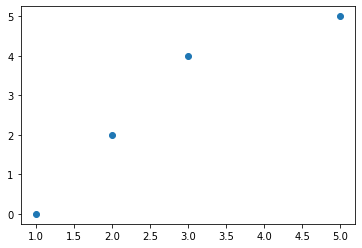

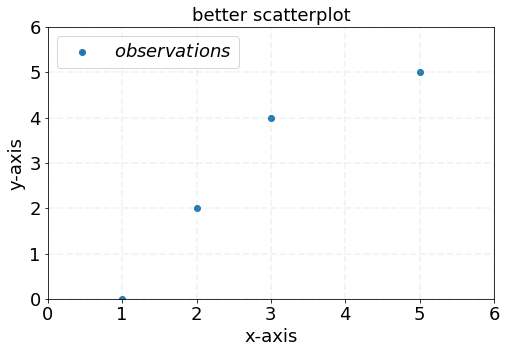

In [63]:
# create arrays
x_train = np.array([1,2,3,5])
y_train = np.array([0,2,4,5])

# check dimensions
x_train.shape
y_train.shape

# reshape
x_train = x_train.reshape(4,1)
y_train = y_train.reshape(4,1)

# simple scatterplot
plt.scatter(x_train,y_train)

# better scatterplot
def better_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(0, np.max(y) + 1)

    # adjust tickmark sizes
    ax.tick_params(labelsize = f_size)
    
    # adjust axis label sizes
    ax.set_xlabel('x-axis', fontsize = f_size)
    ax.set_ylabel('y-axis', fontsize = f_size)
    
    # title
    ax.set_title(title, fontsize = f_size)

    # gridlines
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # actual plot
    ax.scatter(x, y, label=r'$observations$')
    ax.legend(loc='upper left', fontsize = f_size);
    
    return ax

better_scatterplot(x_train, y_train, 'better scatterplot')

In [64]:
# solution
x_train = np.array([1,2,3,5])
y_train = np.array([0,2,4,5])

In [65]:
x_train.shape

(4,)

In [66]:
x_train = x_train.reshape(4,1)
x_train.shape

(4, 1)

(4, 1) (4,)


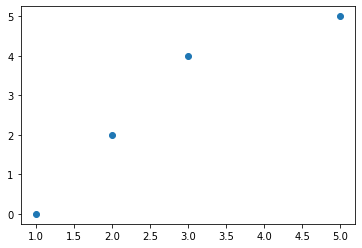

In [67]:
# Make a simple scatterplot
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)

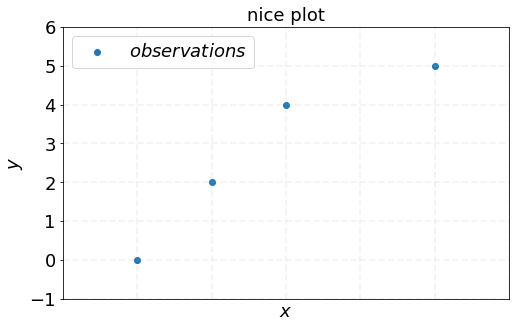

In [68]:
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$my points$')
    #ax.scatter(x, y, label='$my points$')
    ax.scatter(x, y, label=r'$observations$')
    ax.legend(loc='upper left', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'nice plot')



#### Closed-form solution

For the single predictor case, we have the following explicit solution:
    \begin{align}
      \beta_1 &= \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}\\
      \beta_0 &= \bar{y} - \beta_1\bar{x}\
    \end{align}
    
where $\bar{y}$ and $\bar{x}$ are the mean of the y values and the mean of the x values, respectively.

###  Building a model from scratch
In this part, we will solve the equations for simple linear regression and find the best fit solution to our toy problem.

The snippets of code below implement the linear regression equations on the observed predictors and responses, which we'll call the training data set.  Let's walk through the code.

We have to reshape our arrrays to 2D because each row correspondes to one observation.

<div class="exercise"><b>Exercise</b></div>

* make an array with shape (2,3)
* reshape it to a size that you want

In [69]:
# make array with (2, 3) and reshape
num_arr = np.array([[1,3,5],[2,4,6]])
num_reshape = num_arr.reshape(-1, 2)
print(num_arr.shape, num_reshape.shape)

# reshape to 2d array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)
print(x_train.shape,y_train.shape)

# compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

#slope beta1
beta_1 = numerator/denominator

#intercept beta0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(beta_0, beta_1))

(2, 3) (3, 2)
(4, 1) (4, 1)
The best-fit line is -0.63 + 1.23 * x


In [70]:
#solution
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
print(xx.shape,xxx.shape)

(2, 3) (3, 2)


In [71]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
#x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(y_train.shape[0], 1)
print(x_train.shape,y_train.shape)

(4, 1) (4, 1)


In [72]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms, remember the element-wise computation in numpy array 
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator, denominator) #check results

10.75 8.75


In [73]:
#slope beta1
beta_1 = numerator/denominator

#intercept beta0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(beta_0, beta_1))

The best-fit line is -0.63 + 1.23 * x


<div class="exercise"><b>Exercise</b></div>

Next, you can write a function called `simple_linear_regression_fit`, that inputs the training data and returns `beta0` and `beta1`.

```python
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    
    return
```

Check your function by calling it with the training data from above and printing out the beta values.

In [74]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:

    # check size
    if len(x_train.shape) < 2:
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        y_train = y_train.reshape(y_train.shape[0], 1)

    # compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope beta1
    beta_1 = numerator/denominator

    #intercept beta0
    beta_0 = y_bar - beta_1*x_bar

    return np.array([beta_0,beta_1])

In [75]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope beta1
    beta_1 = numerator/denominator

    #intercept beta0
    beta_0 = y_bar - beta_1*x_bar

    return np.array([beta_0,beta_1])


* Let's run this function and see the coefficients

In [76]:
x_train = np.array([1, 2, 5, 6])
y_train = np.array([0, 3, 4, 7])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

Reshaping features array.
Reshaping observations array.
The best-fit line is -0.411765 + 1.117647 * x


<div class="exercise"><b>Exercise</b></div>

* Do the values of `beta0` and `beta1` seem reasonable?
* Plot the training data using a scatter plot.
* Plot the best fit line with `beta0` and `beta1` together with the training data.

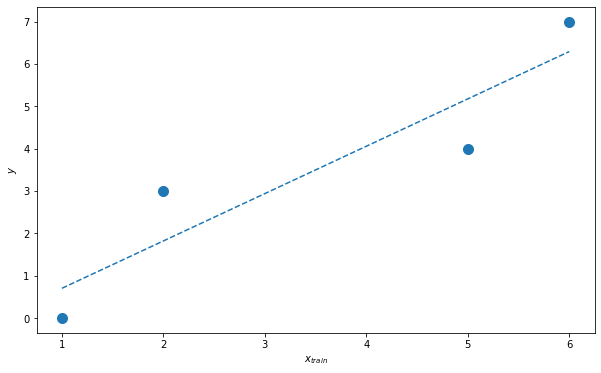

In [77]:
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# plot best-fit
x_train = np.array([[1, 2, 5, 6]]).T

best_fit = beta_0 + beta_1 * x_train

ax_scat.scatter(x_train, y_train, s=100, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

# set axes labels
ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$');

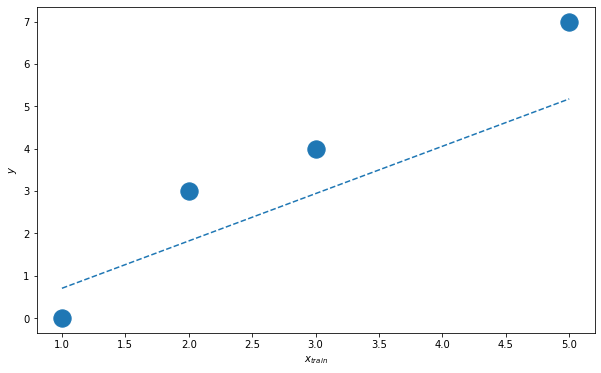

In [78]:
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x_train = np.array([[1, 2, 3, 5]]).T

best_fit = beta_0 + beta_1 * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$');


The values of `beta0` and `beta1` seem roughly reasonable.  They capture the positive correlation.  The line does appear to be trying to get as close as possible to all the points.

<a class="anchor" id="fourth-bullet"></a>
## Building a model with `statsmodels` and `sklearn`

Now that we can concretely fit the training data from scratch, let's learn two `python` packages to do it all for us:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) and 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from `statsmodels` and `sklearn` to the $\beta$ values that we found from above with our own implementation.

`statsmodels` tends to be easier for inference \[finding the values of the slope and intercept and dicussing uncertainty in those values\], whereas `sklearn` has machine-learning algorithms and is better for prediction \[guessing y values for a given x value\]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

**Note:** `statsmodels` and `sklearn` are different packages!  Unless we specify otherwise, you can use either one.

Below is the code for `statsmodels`.  `Statsmodels` does not by default include the column of ones in the $X$ matrix (coresponding to the intercept), so we include it manually with `sm.add_constant`.

In [79]:
import statsmodels.api as sm

In [80]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 5.]]
The regression coef from statsmodels are: beta_0 = -1.057143 and beta_1 = 1.657143


Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.

In [81]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     49.47
Date:                Sat, 31 Jul 2021   Prob (F-statistic):             0.0196
Time:                        17:46:38   Log-Likelihood:                -2.8452
No. Observations:                   4   AIC:                             9.690
Df Residuals:                       2   BIC:                             8.463
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0571      0.736     -1.437      0.2

Now let's turn our attention to the `sklearn` library.

In [82]:
from sklearn import linear_model

In [83]:
# build the least squares model
toyregr = linear_model.LinearRegression()

print(x_train.shape,y_train.shape)
# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

(4, 1) (4,)
The regression coefficients from the sklearn package are: beta_0 = -1.057143 and beta_1 = 1.657143


We should feel pretty good about ourselves now, and we're ready to move on to a real problem!

### The `scikit-learn` library and the shape of things

Before diving into a "real" problem, let's discuss more of the details of `sklearn`.

`Scikit-learn` is the main `Python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split()`. 

Use the following to add the library into your code:

```python
import sklearn 
```

In `scikit-learn`, an **estimator** is a Python object that implements the methods `fit(X, y)` and `predict(T)`

Let's see the structure of `scikit-learn` needed to make these fits. `fit()` always takes two arguments:
```python
estimator.fit(xtrain, ytrain)
```
We will consider two estimators in this lab: `LinearRegression` and `KNeighborsRegressor`.

It is very important to understand that `xtrain` must be in the form of a **2x2 array** with each row corresponding to one sample, and each column corresponding to the feature values for that sample.

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.

![](../images/featurematrix.png)

<!--![](../images/sklearn2.jpg)-->

### Practice with `sklearn` and a real dataset
We begin by loading up the `mtcars` dataset. This data was extracted from the 1974 Motor Trend US magazine, and comprises of fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). We will load this data to a dataframe with 32 observations on 11 (numeric) variables. Here is an explanation of the features:

- `mpg` is Miles/(US) gallon 
- `cyl` is Number of cylinders, 
- `disp` is	Displacement (cu.in.), 
- `hp` is	Gross horsepower, 
- `drat` is	Rear axle ratio, 
- `wt` is the Weight (1000 lbs), 
- `qsec` is 1/4 mile time,
- `vs` is Engine (0 = V-shaped, 1 = straight), 
- `am` is Transmission (0 = automatic, 1 = manual), 
- `gear` is the Number of forward gears, 
- `carb` is	Number of carburetors.

In [84]:
import os
import tarfile
import urllib

# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd

DATASET_PATH = "/content/drive/MyDrive/Computer Science/UCLA CSSI/HW1/HW1"

def load_cars_data(cars_path):
    csv_path = os.path.join(DATASET_PATH, "mtcars.csv")
    return pd.read_csv(csv_path)

dfcars = load_cars_data(DATASET_PATH)
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [86]:
# Fix the column title 
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [87]:
dfcars.shape

(32, 12)

#### Searching for values: how many cars have 4 gears?

In [88]:
len(dfcars[dfcars.gear == 4].drop_duplicates(subset='car name', keep='first'))

12

Next, let's split the dataset into a training set and test set.

In [89]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [90]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (32, 12)
Shape of training dataset is: (25, 12)
Shape of test dataset is: (7, 12)


Now we have training and test data.  We still need to select a predictor and a response from this dataset.  Keep in mind that we need to choose the predictor and response from both the training and test set.  You will do this in the exercises below.  However, we provide some starter code for you to get things going.

In [91]:
traindf.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [92]:
# Extract the response variable that we're interested in
y_train = traindf.mpg
y_train

25    27.3
12    17.3
0     21.0
4     18.7
16    14.7
5     18.1
13    15.2
11    16.4
23    13.3
1     21.0
2     22.8
26    26.0
3     21.4
21    15.5
27    30.4
22    15.2
18    30.4
31    21.4
20    21.5
7     24.4
10    17.8
14    10.4
28    15.8
19    33.9
6     14.3
Name: mpg, dtype: float64

In [93]:
y_train.shape, type(y_train)

((25,), pandas.core.series.Series)

### Array reshape
This is a 1D array as should be the case with the **Y** array.  Remember, `sklearn` requires a 2D array only for the predictor array.  You will have to pay close attention to this in the exercises later. `Sklearn` doesn't care too much about the shape of `y_train`.

The whole reason we went through that whole process was to show you how to reshape your data into the correct format.

**IMPORTANT:** Remember that your response variable `ytrain` can be a vector but your predictor variable `xtrain` ***must*** be an array!

<a class="anchor" id="fifth-bullet"></a>
## Example: Simple linear regression with automobile data
We will now use `sklearn` to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.

We need to choose the variables that we think will be good predictors for the response `mpg`. 

<div class="exercise"><b>Exercise in pairs</b></div>

* Pick one variable to use as a predictor for simple linear regression.
* Justify your choice with some visualizations.  
* Is there a second variable you'd like to use? For example, we're not doing multiple linear regression here, but if we were, is there another variable you'd like to include if we were using two predictors?

In [94]:
x_wt = dfcars.wt
x_wt.shape

(32,)

Text(0, 0.5, 'Car MPG')

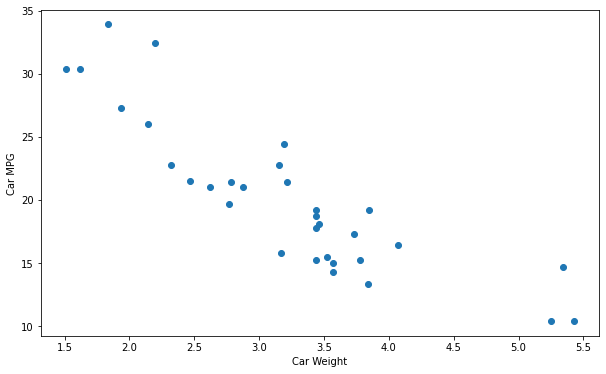

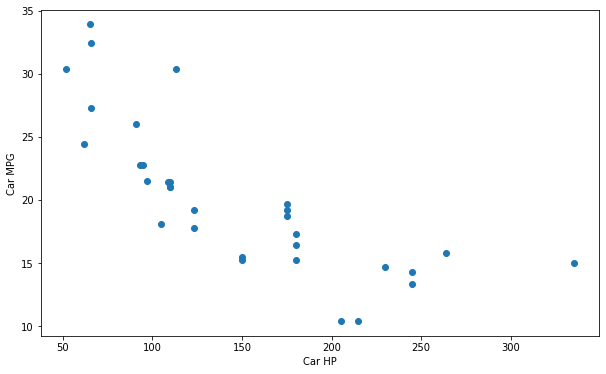

In [95]:
y_mpg = dfcars.mpg
x_wt = dfcars.wt
x_hp = dfcars.hp

fig_wt, ax_wt = plt.subplots(1,1, figsize=(10,6))
ax_wt.scatter(x_wt, y_mpg)
ax_wt.set_xlabel(r'Car Weight')
ax_wt.set_ylabel(r'Car MPG')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_hp, y_mpg)
ax_hp.set_xlabel(r'Car HP')
ax_hp.set_ylabel(r'Car MPG')

Text(0, 0.5, 'Car MPG')

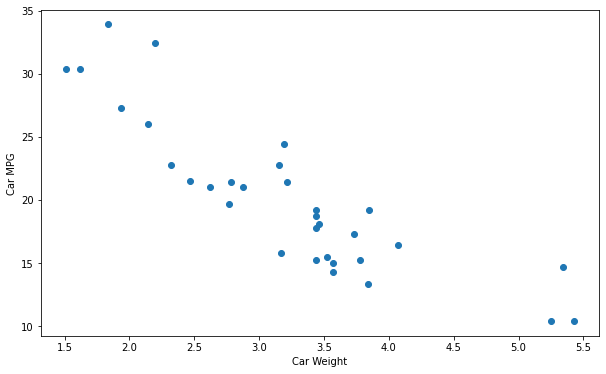

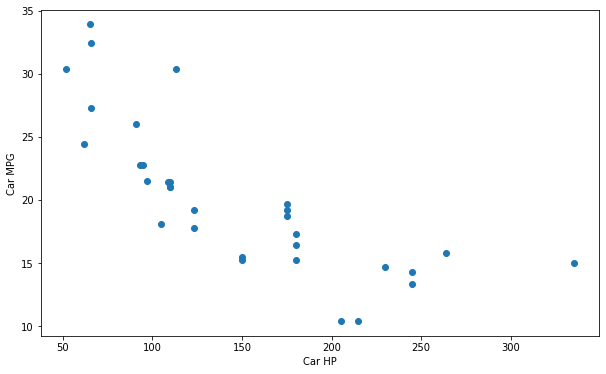

In [96]:
y_mpg = dfcars.mpg
x_wt = dfcars.wt
x_hp = dfcars.hp

fig_wt, ax_wt = plt.subplots(1,1, figsize=(10,6))
ax_wt.scatter(x_wt, y_mpg)
ax_wt.set_xlabel(r'Car Weight')
ax_wt.set_ylabel(r'Car MPG')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_hp, y_mpg)
ax_hp.set_xlabel(r'Car HP')
ax_hp.set_ylabel(r'Car MPG')


<div class="exercise"><b>Exercise</b></div>

* Use `sklearn` to fit the training data using simple linear regression.
* Use the model to make mpg predictions on the test set.  
* Plot the data and the prediction.  
* Print out the mean squared error for the training set and the test set and compare.

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

DATASET_PATH = "/content/drive/MyDrive/Computer Science/UCLA CSSI/HW1/HW1"

def load_cars_data(cars_path):
    csv_path = os.path.join(DATASET_PATH, "mtcars.csv")
    return pd.read_csv(csv_path)

dfcars = load_cars_data(DATASET_PATH)
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [98]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [99]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

In [100]:
# train and test shape
y_train.shape, X_train.shape

((25,), (25, 1))

In [101]:
y_test.shape, X_test.shape

((7,), (7, 1))

In [102]:
#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

predicted_y = regression.predict(X_test)

r2 = regression.score(X_test, y_test)
print(f'R^2 = {r2:.5}')

R^2 = 0.68798


In [103]:
print(regression.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

0.7701379909791617
12.475985659918823
7.773697766387515
Coefficients: 
 -5.336941400557082 36.93731031351842


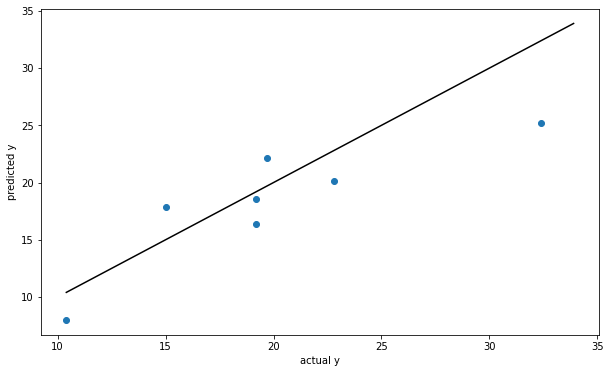

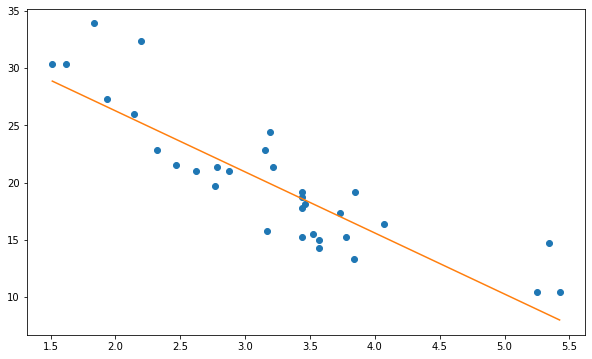

In [104]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
ax.plot(grid, grid, color="black") # 45 degree line
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(dfcars.wt, dfcars.mpg, 'o')
xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
ax1.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))

## Bootstrap

In [105]:
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor

In [106]:
x = np.linspace(0, 10, 20)
y=x + np.random.randn(len(x))

In [107]:
n_estimators = 1000
model = BaggingRegressor(linear_model.LinearRegression(), 
                         n_estimators=n_estimators,
                         bootstrap=True,max_samples=20)

In [108]:
model.fit(x.reshape(20,1), y)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=20, n_estimators=1000, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [109]:
intercept=[]
beta1=[]
for m in model.estimators_:
    intercept.append(m.intercept_)
    beta1.append(m.coef_[0])

In [110]:
np.std(intercept),np.std(beta1),np.mean(intercept),np.mean(beta1)

(0.41928363881239494,
 0.06682292276013407,
 0.4851206513462427,
 0.9030963477492712)

Bonus questions: 

1. For linear regression notebook, add a cell to run polynomial regression with max degree 2 for the toy dataset, i.e., y=β_0+β_1 x+β_2 x^2. Note, you do not need to implement polynomial regression, but just change your dataset.
2. For linear regression notebook, implement another gradient descent-based function to estimate β_0 and β_1.


In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
x_train = np.array(traindf.wt)
x_train = x_train.reshape(x_train.shape[0], 1)

y_test = np.array(testdf.mpg)
x_test = np.array(testdf.wt)
x_test = x_test.reshape(x_test.shape[0], 1)

poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
x_train = np.array(traindf.wt)
x_train = x_train.reshape(x_train.shape[0], 1)

y_test = np.array(testdf.mpg)
x_test = np.array(testdf.wt)
x_test = x_test.reshape(x_test.shape[0], 1)

sgd = make_pipeline(StandardScaler(), SGDRegressor())
sgd.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)